In [1]:
import pandas as pd
import geopandas as gpd
import os
import pylab as plt
from importlib import reload
import pyEmdat.emdat_df
reload(pyEmdat.emdat_df)
from pyEmdat.emdat_df import emdat
import geocoder
import datetime
%pylab inline

data = os.getenv('data')

Populating the interactive namespace from numpy and matplotlib


/home/nicholasjones/miniconda3/envs/GPD3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Parsing the location field of EMDAT

#### 1. Load downloaded Excel file as a PyEmdat object

In [2]:
ED = emdat((data + '/emdat_1960.xlsx'))

/home/nicholasjones/Code/pyEmdat/emdat_df.py:39: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  self.data = pd.read_excel(filename, header = 6, parse_dates=['Year']).rename(columns = cols_dict)


#### 2. Summary for Pakistan by hazard

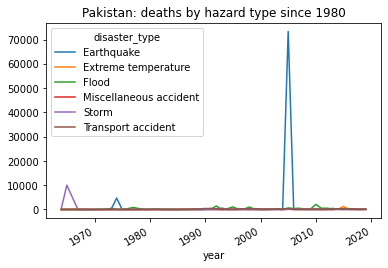

In [3]:
df = ED.disaster_stats_timeseries(1960, 2020, 'Pakistan','all','deaths')
cols_over_1000 = [column for column in df.columns if df[column].sum() > 1000]
df[cols_over_1000].plot(title = 'Pakistan: deaths by hazard type since 1980');

#### 3.Explore location field

In [101]:
df = ED.data
df = df[df.country == 'Pakistan'][['dis_no', 'country', 'year', 'disaster_group', 'disaster_subgroup',
       'disaster_type', 'disaster_subtype', 'Disaster Subsubtype',
       'event_name', 
       'location', 'lat', 'lon', 'deaths', 'injured', 'affected', 'homeless',
       'total_affected', 'reconstruction_costs', 'insured_damages',
       'total_damages', 'CPI']].reset_index(drop=True)

In [102]:
df[['location','disaster_type','event_name','total_damages','dis_no']].head(2)

,location,disaster_type,event_name,total_damages,dis_no
0,"Coast, Low Indus valley",Storm,NaN,4100.0,1964-0034-PAK
1,Lahore district,Flood,NaN,500.0,1964-0056-PAK


In [6]:
gadm1 = gpd.read_file(os.getenv('data')+'/GADM_PAK/gadm36_PAK_1.shp')
gadm2 = gpd.read_file(os.getenv('data')+'/GADM_PAK/gadm36_PAK_2.shp')
gadm3 = gpd.read_file(os.getenv('data')+'/GADM_PAK/gadm36_PAK_3.shp')

In [7]:
print(gadm2.NAME_2.unique())

['Azad Kashmir' 'Kalat' 'Makran' 'Nasirabad' 'Quetta' 'Sibi' 'Zhob'
 'F.A.T.A.' 'Islamabad' 'Bannu' 'Dera Ismail Khan' 'Hazara' 'Kohat'
 'Malakand' 'Mardan' 'Peshawar' 'Northern Areas' 'Bahawalpur'
 'Dera Ghazi Khan' 'Faisalabad' 'Gujranwala' 'Lahore' 'Multan'
 'Rawalpindi' 'Sargodha' 'Hyderabad' 'Karachi' 'Larkana' 'Mirpur Khas'
 'Rann of Kutch' 'Sukkur']


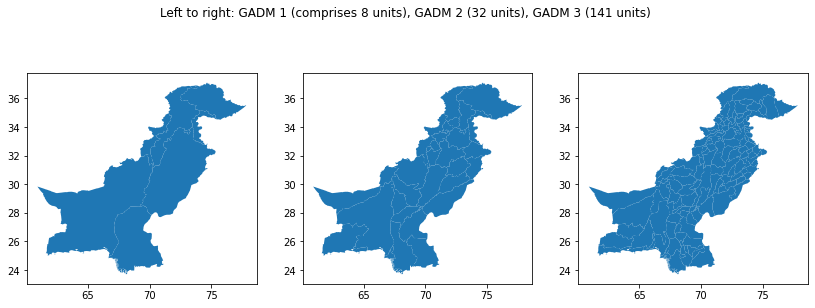

In [8]:
f,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=[14,5])
gadm1.plot(ax=ax1)
gadm2.plot(ax=ax2)
gadm3.plot(ax=ax3)
plt.suptitle('Left to right: GADM 1 (comprises {} units), GADM 2 ({} units), GADM 3 ({} units)'.format(len(gadm1),
                                                                                                len(gadm2),len(gadm3)));


#### 1. Try geocoding with OSM (Nominatim)

In [9]:
df.location[:15]

0                   Coast, Low Indus valley
1                           Lahore district
2                                   Karachi
3                              Karachi area
4                           Multan District
5                                   Karachi
6       Tangir, Gupis, Rawalpindi, Peshawar
7                              Punjab, Sind
8     North Indus R. Valley, Balakot, Patan
9                                       NaN
10                                      NaN
11        Punjab, Sind, North West Frontier
12                                  Karachi
13                                      NaN
14                             Sind, Punjab
Name: location, dtype: object

In [10]:
g = geocoder.osm('Karachi, Pakistan')
g.json

{'accuracy': 0.35,
 'address': 'کراچی, سنڌ, پاکستان',
 'bbox': {'northeast': [25.676796, 67.5554108],
  'southwest': [24.6008516, 66.4154565]},
 'city': 'کراچی',
 'confidence': 1,
 'country': 'پاکستان',
 'country_code': 'pk',
 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons//poi_boundary_administrative.p.20.png',
 'importance': 0.35,
 'lat': 24.8667795,
 'lng': 67.0311286,
 'ok': True,
 'osm_id': 6080948,
 'osm_type': 'relation',
 'place_id': 259113050,
 'place_rank': 16,
 'quality': 'administrative',
 'raw': {'place_id': 259113050,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'relation',
  'osm_id': 6080948,
  'boundingbox': ['24.6008516', '25.676796', '66.4154565', '67.5554108'],
  'lat': '24.8667795',
  'lon': '67.0311286',
  'display_name': 'کراچی, سنڌ, پاکستان',
  'place_rank': 16,
  'category': 'boundary',
  'type': 'administrative',
  'importance': 0.35,
  'icon': 'https://nominatim.openstreetmap.org/ui/mapicons//p

In [23]:
g = geocoder.osm('Multan district')
g.json

{'accuracy': 0.55,
 'address': 'Multān District, پنجاب, پاکستان',
 'bbox': {'northeast': [30.783333, 72.366667],
  'southwest': [29.383333, 70.966667]},
 'confidence': 1,
 'country': 'پاکستان',
 'country_code': 'pk',
 'county': 'Multān District',
 'importance': 0.55,
 'lat': 30.083333,
 'lng': 71.666667,
 'ok': True,
 'osm_id': 316440952,
 'osm_type': 'node',
 'place_id': 1278689,
 'place_rank': 12,
 'quality': 'county',
 'raw': {'place_id': 1278689,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'node',
  'osm_id': 316440952,
  'boundingbox': ['29.383333', '30.783333', '70.966667', '72.366667'],
  'lat': '30.083333',
  'lon': '71.666667',
  'display_name': 'Multān District, پنجاب, پاکستان',
  'place_rank': 12,
  'category': 'place',
  'type': 'county',
  'importance': 0.55,
  'address': {'county': 'Multān District',
   'state': 'پنجاب',
   'country': 'پاکستان',
   'country_code': 'pk'}},
 'region': 'پنجاب',
 'state': 'پنجاب',
 'sta

In [24]:
g = geocoder.osm('Tangir, Gupis, Rawalpindi, Peshawar')
g.json


In [26]:
g = geocoder.osm('Tangir, Pakistan')
g.json

{'accuracy': 0.275,
 'address': 'Tangīr, Lurg, گلگت بلتستان, پاکستان',
 'bbox': {'northeast': [35.5814649, 73.516582],
  'southwest': [35.5323027, 73.5038265]},
 'confidence': 6,
 'country': 'پاکستان',
 'country_code': 'pk',
 'importance': 0.275,
 'lat': 35.560828,
 'lng': 73.507613,
 'ok': True,
 'osm_id': 273152437,
 'osm_type': 'way',
 'place_id': 157703834,
 'place_rank': 19,
 'quality': 'river',
 'raw': {'place_id': 157703834,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'way',
  'osm_id': 273152437,
  'boundingbox': ['35.5323027', '35.5814649', '73.5038265', '73.516582'],
  'lat': '35.560828',
  'lon': '73.507613',
  'display_name': 'Tangīr, Lurg, گلگت بلتستان, پاکستان',
  'place_rank': 19,
  'category': 'waterway',
  'type': 'river',
  'importance': 0.275,
  'address': {'waterway': 'Tangīr',
   'village': 'Lurg',
   'state': 'گلگت بلتستان',
   'country': 'پاکستان',
   'country_code': 'pk'}},
 'region': 'گلگت بلتستان',
 'sta

In [28]:
g = geocoder.osm('Punjab, Sind, North West Frontier')
g.json


In [29]:
g = geocoder.osm('North West Frontier, Pakistan')
g.json


{'accuracy': 0.001,
 'address': 'Nangarhar Building, Peshawar Ring Road, Haider Colony, پېښور, خیبر پښتونخوا, 25210, پاکستان',
 'bbox': {'northeast': [33.9818617, 71.5760892],
  'southwest': [33.9817617, 71.5759892]},
 'city': 'پېښور',
 'confidence': 10,
 'country': 'پاکستان',
 'country_code': 'pk',
 'importance': 0.001,
 'lat': 33.9818117,
 'lng': 71.5760392,
 'ok': True,
 'osm_id': 1350185146,
 'osm_type': 'node',
 'place_id': 14542715,
 'place_rank': 30,
 'postal': '25210',
 'quality': 'townhall',
 'raw': {'place_id': 14542715,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'node',
  'osm_id': 1350185146,
  'boundingbox': ['33.9817617', '33.9818617', '71.5759892', '71.5760892'],
  'lat': '33.9818117',
  'lon': '71.5760392',
  'display_name': 'Nangarhar Building, Peshawar Ring Road, Haider Colony, پېښور, خیبر پښتونخوا, 25210, پاکستان',
  'place_rank': 30,
  'category': 'amenity',
  'type': 'townhall',
  'importance': 0.001,
  'add

In [11]:
df100 = df[:100]

In [12]:
def get_accuracy(location):
    try:
        g = geocoder.osm(location)
        return(g.json['accuracy'])
    except:
        return(0)

In [18]:
acc = [get_accuracy(location) for location in df100.location]

In [19]:
df100['accuracy'] = acc

/home/nicholasjones/miniconda3/envs/GPD3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


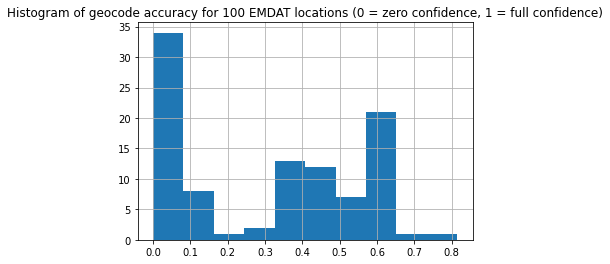

In [20]:
df100.accuracy.hist()
plt.title('Histogram of geocode accuracy for 100 EMDAT locations (0 = zero confidence, 1 = full confidence)');

__Advantages:__
* accuracy field allows to screen out weak results or apply different processing steps for them
* returns 'type' which could be city, district, type of amenity etc
* generally returns lat/lon

__Disadvantage:__
* Doesn't consistently give parent geographies
* Names often in local language and script

#### 2. Try with Geonames

In [21]:
g = geocoder.geonames('Karachi, Pakistan',key='nkwj2')

In [22]:
g.json

{'address': 'Karachi',
 'class_description': 'city, village,...',
 'code': 'PPLA',
 'country': 'Pakistan',
 'country_code': 'PK',
 'description': 'seat of a first-order administrative division',
 'feature_class': 'P',
 'geonames_id': 1174872,
 'lat': '24.8608',
 'lng': '67.0104',
 'ok': True,
 'population': 11624219,
 'raw': {'adminCode1': '05',
  'lng': '67.0104',
  'geonameId': 1174872,
  'toponymName': 'Karachi',
  'countryId': '1168579',
  'fcl': 'P',
  'population': 11624219,
  'countryCode': 'PK',
  'name': 'Karachi',
  'fclName': 'city, village,...',
  'adminCodes1': {'ISO3166_2': 'SD'},
  'countryName': 'Pakistan',
  'fcodeName': 'seat of a first-order administrative division',
  'adminName1': 'Sindh',
  'lat': '24.8608',
  'fcode': 'PPLA'},
 'state': 'Sindh',
 'state_code': '05',
 'status': 'OK'}

In [23]:
g = geocoder.geonames('Multan district',key='nkwj2')

In [36]:
g.json

{'address': 'Rawalpindi',
 'class_description': 'city, village,...',
 'code': 'PPLA2',
 'country': 'Pakistan',
 'country_code': 'PK',
 'description': 'seat of a second-order administrative division',
 'feature_class': 'P',
 'geonames_id': 1166993,
 'lat': '33.59733',
 'lng': '73.0479',
 'ok': True,
 'population': 1743101,
 'raw': {'adminCode1': '04',
  'lng': '73.0479',
  'geonameId': 1166993,
  'toponymName': 'Rawalpindi',
  'countryId': '1168579',
  'fcl': 'P',
  'population': 1743101,
  'countryCode': 'PK',
  'name': 'Rawalpindi',
  'fclName': 'city, village,...',
  'adminCodes1': {'ISO3166_2': 'PB'},
  'countryName': 'Pakistan',
  'fcodeName': 'seat of a second-order administrative division',
  'adminName1': 'Punjab',
  'lat': '33.59733',
  'fcode': 'PPLA2'},
 'state': 'Punjab',
 'state_code': '04',
 'status': 'OK'}

In [25]:
g = geocoder.geonames('Tangir,Pakistan',key='nkwj2')

In [26]:
g.json

{'address': 'Tangir',
 'class_description': 'parks,area, ...',
 'code': 'RGN',
 'country': 'Pakistan',
 'country_code': 'PK',
 'description': 'region',
 'feature_class': 'L',
 'geonames_id': 1163922,
 'lat': '35.71305',
 'lng': '73.35699',
 'ok': True,
 'raw': {'adminCode1': '07',
  'lng': '73.35699',
  'geonameId': 1163922,
  'toponymName': 'Tangir',
  'countryId': '1168579',
  'fcl': 'L',
  'population': 0,
  'countryCode': 'PK',
  'name': 'Tangir',
  'fclName': 'parks,area, ...',
  'adminCodes1': {'ISO3166_2': 'GB'},
  'countryName': 'Pakistan',
  'fcodeName': 'region',
  'adminName1': 'Gilgit-Baltistan',
  'lat': '35.71305',
  'fcode': 'RGN'},
 'state': 'Gilgit-Baltistan',
 'state_code': '07',
 'status': 'OK'}

In [27]:
g = geocoder.geonames('Rawalpindi,Pakistan',key='nkwj2')

In [28]:
g.json

{'address': 'Rawalpindi',
 'class_description': 'city, village,...',
 'code': 'PPLA2',
 'country': 'Pakistan',
 'country_code': 'PK',
 'description': 'seat of a second-order administrative division',
 'feature_class': 'P',
 'geonames_id': 1166993,
 'lat': '33.59733',
 'lng': '73.0479',
 'ok': True,
 'population': 1743101,
 'raw': {'adminCode1': '04',
  'lng': '73.0479',
  'geonameId': 1166993,
  'toponymName': 'Rawalpindi',
  'countryId': '1168579',
  'fcl': 'P',
  'population': 1743101,
  'countryCode': 'PK',
  'name': 'Rawalpindi',
  'fclName': 'city, village,...',
  'adminCodes1': {'ISO3166_2': 'PB'},
  'countryName': 'Pakistan',
  'fcodeName': 'seat of a second-order administrative division',
  'adminName1': 'Punjab',
  'lat': '33.59733',
  'fcode': 'PPLA2'},
 'state': 'Punjab',
 'state_code': '04',
 'status': 'OK'}

In [ ]:
# feature class is generally P (populated place), A (an admin unit), or L (natural land, park etc)

In [110]:
def parse_geonames(location,country="PK"):
    g = geocoder.geonames(location,key='nkwj2',country=country)
    return([g.feature_class, g.code, g.description, g.geonames_id, g.state,g.class_description])

# feature_class, code, description, geonames_ID, state, class_description=

In [112]:
parse_geonames('Hyderabad')

['P',
 'PPLA2',
 'seat of a second-order administrative division',
 1176734,
 'Sindh',
 'city, village,...']

In [60]:
geonames_100_locations = {k:parse_geonames(k) for k in df100.location}

In [61]:
geonames_100_df = pd.DataFrame(geonames_100_locations).T
geonames_100_df.columns = 'feature_class','code','description','geonames_id','state','class_description'
geonames_100_df

,feature_class,code,description,geonames_id,state,class_description
"Coast, Low Indus valley",None,None,None,None,None,None
Lahore district,P,PPLA,seat of a first-order administrative division,1172451,Punjab,"city, village,..."
Karachi,P,PPLA,seat of a first-order administrative division,1174872,Sindh,"city, village,..."
Karachi area,A,ADM3,third-order administrative division,9411312,Katsina,"country, state, region,..."
Multan District,P,PPLA2,seat of a second-order administrative division,1169825,Punjab,"city, village,..."
...,...,...,...,...,...,...
"Gultar, Thalestal (Near Chota Deeosai, Skardu district)",None,None,None,None,None,None
"Keti Bandar, Hyderabad",None,None,None,None,None,None
Cachemire,P,PPLA,seat of a first-order administrative division,1255634,Jammu and Kashmir,"city, village,..."
Jang Shahi (Karachi),None,None,None,None,None,None


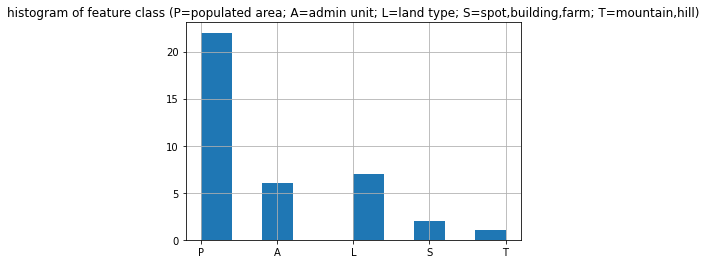

In [68]:
geonames_100_df.feature_class.hist()
plt.title('histogram of feature class (P=populated area; A=admin unit; L=land type; S=spot,building,farm; T=mountain,hill)');

In [69]:
# https://www.geonames.org/export/codes.html

<AxesSubplot:>

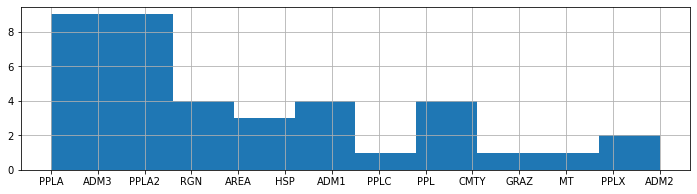

In [76]:
geonames_100_df.code.hist(figsize=[12,3])

In [77]:
geonames_100_df.code.value_counts()

PPLA2    9
PPLA     8
RGN      4
ADM1     4
PPL      3
AREA     2
ADM2     1
ADM3     1
CMTY     1
GRAZ     1
PPLC     1
MT       1
PPLX     1
HSP      1
Name: code, dtype: int64

In [93]:
geonames_100_df.state.value_counts()

Punjab                12
Balochistan            5
Sindh                  5
Khyber Pakhtunkhwa     3
                       2
Jammu and Kashmir      2
Ahal                   1
Baranya                1
Katsina                1
Taiwan                 1
Gandaki Pradesh        1
Minnesota              1
Khorāsān-e Jonūbī      1
Telangana              1
Dhaka                  1
Name: state, dtype: int64

#### 3. GeoNames hierarchy search

In [80]:
geonames_100_df

,feature_class,code,description,geonames_id,state,class_description
"Coast, Low Indus valley",None,None,None,None,None,None
Lahore district,P,PPLA,seat of a first-order administrative division,1172451,Punjab,"city, village,..."
Karachi,P,PPLA,seat of a first-order administrative division,1174872,Sindh,"city, village,..."
Karachi area,A,ADM3,third-order administrative division,9411312,Katsina,"country, state, region,..."
Multan District,P,PPLA2,seat of a second-order administrative division,1169825,Punjab,"city, village,..."
...,...,...,...,...,...,...
"Gultar, Thalestal (Near Chota Deeosai, Skardu district)",None,None,None,None,None,None
"Keti Bandar, Hyderabad",None,None,None,None,None,None
Cachemire,P,PPLA,seat of a first-order administrative division,1255634,Jammu and Kashmir,"city, village,..."
Jang Shahi (Karachi),None,None,None,None,None,None


In [96]:
hier1=geocoder.geonames(1169825,key='nkwj2',method='hierarchy')

In [97]:
hier1.geojson['features'][3:]

[{'type': 'Feature',
  'properties': {'address': 'Punjab',
   'class_description': 'country, state, region,...',
   'code': 'ADM1',
   'country': 'Pakistan',
   'country_code': 'PK',
   'description': 'first-order administrative division',
   'feature_class': 'A',
   'geonames_id': 1167710,
   'lat': '30.85',
   'lng': '72.31667',
   'ok': True,
   'population': 85579866,
   'raw': {'adminCode1': '04',
    'lng': '72.31667',
    'geonameId': 1167710,
    'toponymName': 'Punjab Province',
    'countryId': '1168579',
    'fcl': 'A',
    'population': 85579866,
    'countryCode': 'PK',
    'name': 'Punjab',
    'fclName': 'country, state, region,...',
    'adminCodes1': {'ISO3166_2': 'PB'},
    'countryName': 'Pakistan',
    'fcodeName': 'first-order administrative division',
    'adminName1': 'Punjab',
    'lat': '30.85',
    'fcode': 'ADM1'},
   'state': 'Punjab',
   'state_code': '04',
   'status': 'OK'},
  'geometry': {'type': 'Point', 'coordinates': ['72.31667', '30.85']}},
 {'type':

In [98]:
# nested geographies ... should be able to pull out the lowest available admin unit (ADM1 or 2)

#### 4. Application: count events by provine
This section will try a simple application, getting the province (ADM1) for each event.

In [107]:
print("there are {} events recorded by EMDAT in Pakistan since 1964".format(len(df)))

there are 448 events recorded by EMDAT in Pakistan since 1964


In [113]:
df_geocoded = {k:parse_geonames(k) for k in df.location}

In [141]:
pd.set_option('display.max_rows', 100)

In [144]:
df_geocoded = pd.DataFrame(df_geocoded).T
df_geocoded.columns = 'feature_class','code','description','geonames_id','state','class_description'

In [148]:
df_geocoded[:50]

,feature_class,code,description,geonames_id,state,class_description
"Coast, Low Indus valley",None,None,None,None,None,None
Lahore district,P,PPLA,seat of a first-order administrative division,1172451,Punjab,"city, village,..."
Karachi,P,PPLA,seat of a first-order administrative division,1174872,Sindh,"city, village,..."
Karachi area,P,PPL,populated place,1173638,Sindh,"city, village,..."
Multan District,P,PPLA2,seat of a second-order administrative division,1169825,Punjab,"city, village,..."
"Tangir, Gupis, Rawalpindi, Peshawar",None,None,None,None,None,None
"Punjab, Sind",L,RGN,region,7387605,Punjab,"parks,area, ..."
"North Indus R. Valley, Balakot, Patan",None,None,None,None,None,None
NaN,T,MT,mountain,1169384,Gilgit-Baltistan,"mountain,hill,rock,..."
"Punjab, Sind, North West Frontier",None,None,None,None,None,None


In [175]:
df_geocoded[50:100]

,feature_class,code,description,geonames_id,state,class_description
Kashmir,A,ADM1,first-order administrative division,1184196,Azad Kashmir,"country, state, region,..."
"Jacobabab, Nawabsma, Hyderabad (Sind province)",None,None,None,None,None,None
Muzzafarabad,P,PPLX,section of populated place,7792213,Balochistan,"city, village,..."
Northwest,None,None,None,None,None,None
Near Kanpu,None,None,None,None,None,None
Near Mehr,None,None,None,None,None,None
Near Karachi,None,None,None,None,None,None
Near Dera Ismail (Khan),None,None,None,None,None,None
Ghotki,P,PPLA2,seat of a second-order administrative division,1178456,Sindh,"city, village,..."
Nowshera,A,ADM2,second-order administrative division,7419052,Khyber Pakhtunkhwa,"country, state, region,..."


Failure cases:
* contains "near" (near Quetta)
* multiple names separated by commas with "area" (Malakand, Chitral, Peshawar area)
* multiple districts separated by commas (Punjab/Sialkot, Sargodha, Rajanpur, Jhang districts)
* commas and other descriptive text (Punjab, Sind, mountain provinces)
* local name with province in brackets (Garhi Dhoda (Punjab province))
* string of local names with commas Tangir, Gupis, Rawalpindi, Peshawar


<AxesSubplot:ylabel='state'>

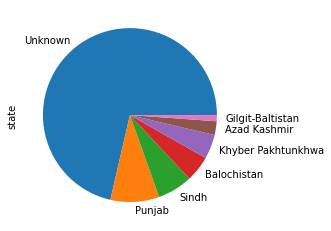

In [143]:
df_geocoded.state.fillna('Unknown').value_counts().plot(kind='pie')

<AxesSubplot:>

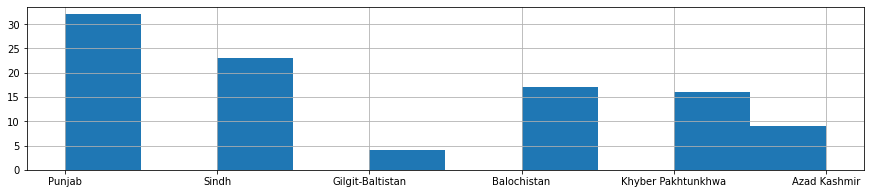

In [123]:
df_geocoded.state.hist(figsize=[15,3])

<AxesSubplot:ylabel='state'>

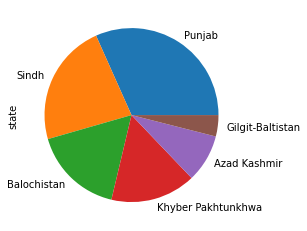

In [125]:
df_geocoded.state.value_counts().plot(kind='pie')

In [208]:
print("proportion of null values: {:.0f}%".format(df_geocoded.feature_class.isnull().sum() * 
                                        100 / len(df_geocoded)))

proportion of null values: 71%


In [151]:
gadm2.NAME_1.unique()

array(['Azad Kashmir', 'Baluchistan', 'F.A.T.A.', 'F.C.T.', 'N.W.F.P.',
       'Northern Areas', 'Punjab', 'Sind'], dtype=object)

In [152]:
df_geocoded.state.unique()

array([None, 'Punjab', 'Sindh', 'Gilgit-Baltistan', 'Balochistan',
       'Khyber Pakhtunkhwa', 'Azad Kashmir'], dtype=object)

In [157]:
gadm1.replace({'N.W.F.P':'Khyber Pakhtunkhwa','Sind':'Sindh','Northern Areas':'Gilgit-Baltistan','Baluchistan':'Balochistan'},inplace=True)

In [166]:
event_count=pd.DataFrame(df_geocoded.state.value_counts())
event_count.columns=['count']
event_count

,count
Punjab,32
Sindh,23
Balochistan,17
Khyber Pakhtunkhwa,16
Azad Kashmir,9
Gilgit-Baltistan,4


In [168]:
gadm1 = gadm1.merge(event_count,left_on='NAME_1',right_on = event_count.index)

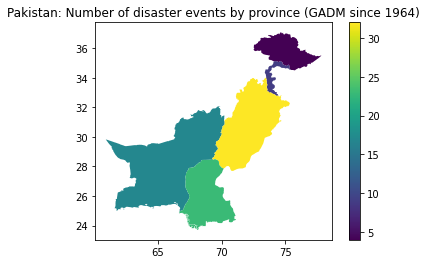

In [173]:
gadm1.plot(column = 'count',legend=True)
plt.title('Pakistan: Number of disaster events by province (GADM since 1964)');

#### Same but clean location field first

In [233]:
def clean_locations(loc_series):
    cleaned1 = loc_series.replace("Near","").replace("and","").str.replace(r"\(.*\)","")
    cleaned1=cleaned1.apply(lambda x: str(x).split()[0])
    cleaned1 = cleaned1.replace(",","",regex=True)
    return(cleaned1)

In [234]:
df['clean_location'] = clean_locations(df.location)

/home/nicholasjones/miniconda3/envs/GPD3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [235]:
df['clean_location'][:50]

0                    Coast
1                   Lahore
2                  Karachi
3                  Karachi
4                   Multan
5                  Karachi
6                   Tangir
7                   Punjab
8                    North
9                      nan
10                     nan
11                  Punjab
12                 Karachi
13                     nan
14                    Sind
15              Rawalpindi
16                     nan
17                Northern
18                     nan
19               Karakoram
20              Gujranwala
21                 Koshkak
22                   North
23                     nan
24                     nan
25    Pakistan/Afghanistan
26                  Phuban
27                 Central
28                  Punjab
29          Chiltral-Landi
30                   Garhi
31                 Karachi
32                 Karachi
33                 Chitral
34                 Karachi
35                 Khuzdar
36                  Punjab
3

In [236]:
df_geocoded1 = {k:parse_geonames(k) for k in df.clean_location}
df_geocoded1 = pd.DataFrame(df_geocoded1).T
df_geocoded1.columns = 'feature_class','code','description','geonames_id','state','class_description'

In [237]:
print("proportion of null values: {:.0f}%".format(df_geocoded1.feature_class.isnull().sum() * 
                                        100 / len(df_geocoded1)))

proportion of null values: 21%


In [239]:
event_count=pd.DataFrame(df_geocoded1.state.value_counts())
event_count.columns=['count_clean']
event_count

,count_clean
Punjab,49
Balochistan,32
Khyber Pakhtunkhwa,32
Sindh,25
Gilgit-Baltistan,12
Azad Kashmir,11
,4
Badakhshan,1
Islamabad,1


In [240]:
gadm1 = gadm1.merge(event_count,left_on='NAME_1',right_on = event_count.index)

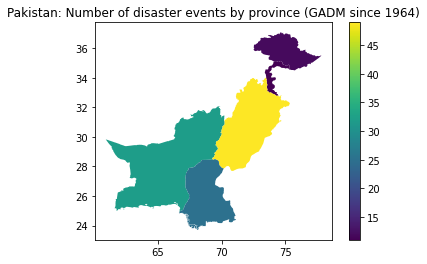

In [242]:
gadm1.plot(column = 'count_clean',legend=True)
plt.title('Pakistan: Number of disaster events by province (GADM since 1964)');

In [243]:
print("proportion of null values: {:.0f}%".format(df_geocoded1.feature_class.isnull().sum() * 
                                        100 / len(df_geocoded1)))

proportion of null values: 21%


In [244]:
# Same for India